In [88]:
# Kütüphaneleri import etme

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
# Veri setini import etme

dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [90]:
# İlk 5 satırı inceleme
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [91]:
# Null değerlerin saptanması
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

[0.09037493 0.02679443 0.07703128 0.02688871 0.12876986 0.02738234
 0.07163365 0.11863748 0.08902254 0.02818921 0.02716258 0.28811299]


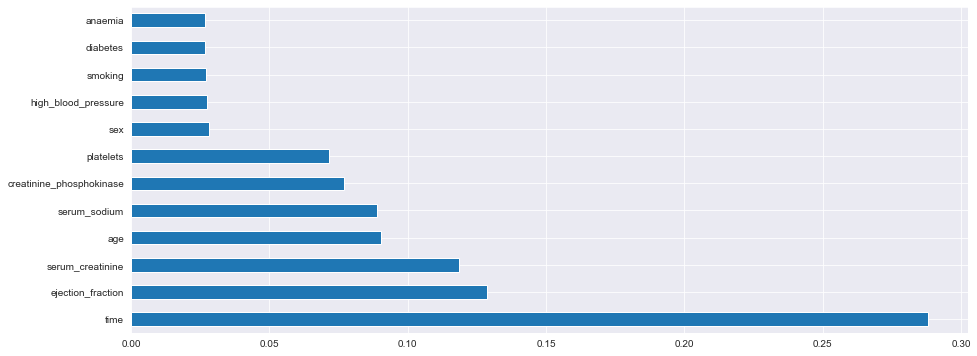

In [92]:
# Özellik Seçimi

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [93]:
# Sadece üç özellik seçeceğiz : time, ejection_fraction, serum_creatinine

-----

Aykırı Değerleri Bulma

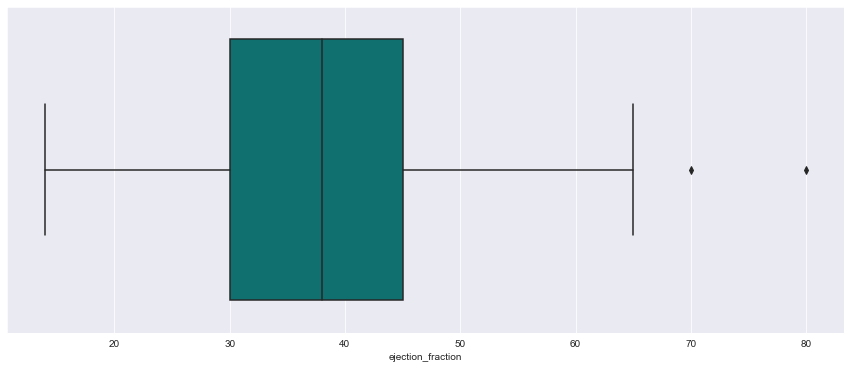

In [94]:
# ejection_fraction için boxplot oluşturma

sns.boxplot(x = dataset.ejection_fraction, color = 'teal')
plt.show()

In [95]:
# Grafikte gördüğümüz üzere iki adet aykırı değer var. Bunları siliyoruz.

In [96]:
dataset[dataset['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [97]:
dataset = dataset[dataset['ejection_fraction']<70]

In [98]:
# Time içinde aykırı değerleri bulma

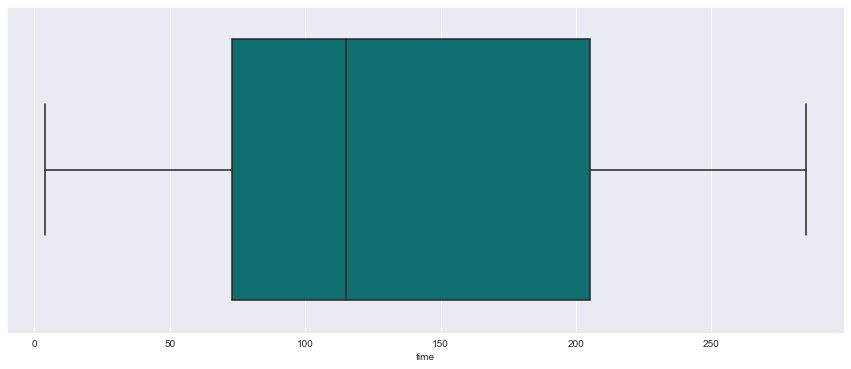

In [99]:
sns.boxplot(x=dataset.time, color = 'teal')
plt.show()

In [100]:
# Aykırı değer yok.

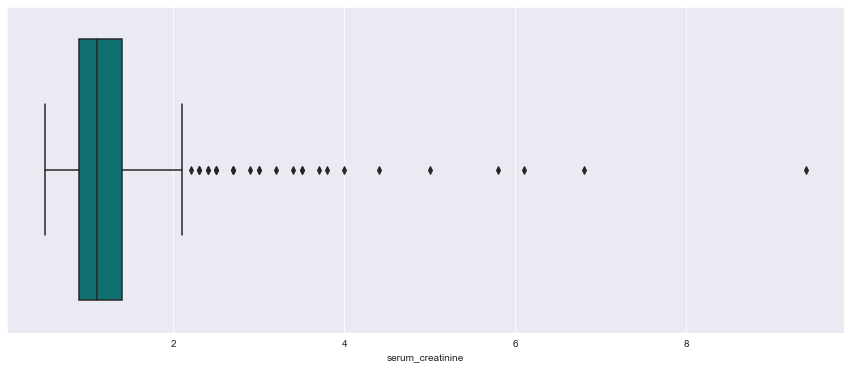

In [101]:
# ejection_fraction için boxplot oluşturma
sns.boxplot(x=dataset.serum_creatinine, color = 'teal')
plt.show()

VERİ SETİNİ İNCELEYELİM

In [102]:
# Yaş Dağılımı

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['age'],
    xbins=dict( # histogram için kullanılan çöp kutuları
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='YAŞ DAĞILIMI',
    xaxis_title_text='YAŞ',
    yaxis_title_text='COUNT', 
    bargap=0.05, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'seaborn'
)

fig.show()

In [103]:
# Farklı yaş gruplarında olan insanların toplam sayısını öğrenmek için mouse ile üzerine gidebilirsiniz

In [104]:
# DEATH_EVENT e göre yukarıdaki histogramı kategorize edelim

import plotly.express as px
fig = px.histogram(dataset, x="age", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns, 
                   title ="Yaş & Ölüm Dağılımı", 
                   labels={"age": "YAŞ"},
                   template="seaborn",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

<div class="alert alert-block alert-info">
geniş alanlar yüksek ihtimali gösterirken dar alanlar daha düşük ihtimali gösteriyor
</div>

In [105]:
# Aynı şekilde diğer özellikleri de inceleyelim

In [106]:
# creatinine_phosphokinase Dağılımı

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['creatinine_phosphokinase'],
    xbins=dict( # bins used for histogram
        start=23,
        end=582,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='Kreatin Fosfokinaz Dağılımı',
    xaxis_title_text='Kreatin Fosfokinaz',
    yaxis_title_text='Count', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'seaborn'
)

fig.show()

In [107]:
# DEATH_EVENT e göre yukarıdaki histogramı kategorize edelim

import plotly.express as px
fig = px.histogram(dataset, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Kreatin Fosfokinaz & Ölüm Dağılımı", 
                   labels={"creatinine_phosphokinase": "Kreatin Fosfokinaz"},
                   template="seaborn",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [108]:
# ejection_fraction dağılımı

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='Ejeksiyon Fraksiyonu Dağılımı',
    xaxis_title_text='Ejeksiyon fraksiyonu',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'seaborn'
)

fig.show()

In [109]:
# DEATH_EVENT e göre yukarıdaki histogramı kategorize edelim

import plotly.express as px
fig = px.histogram(dataset, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Ejeksiyon fraksiyonu & Ölüm", 
                   labels={"ejection_fraction": "Ejeksiyon fraksiyonu"},
                   template="seaborn",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [110]:
# platelets lerin dağılımı

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['platelets'],
    xbins=dict( 
        start=25000,
        end=300000,
        size=5000
    ),
    marker_color='#50BFE6',
    opacity=1
))

fig.update_layout(
    title_text='Kan Pulcuğu Dağılımı',
    xaxis_title_text='Kan Pulcuğu',
    yaxis_title_text='COUNT', 
    bargap=0.05, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'seaborn'
)

fig.show()

In [111]:
# DEATH_EVENT e göre yukarıdaki histogramı kategorize edelim

import plotly.express as px
fig = px.histogram(dataset, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Kan Pulcuğu & Ölüm Dağılımı ", 
                   labels={"platelets": "Kan Pulcuğu"},
                   template="seaborn",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [112]:
# serum_creatinine dağılımı

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['serum_creatinine'],
    xbins=dict( 
        start=0.5,
        end=9.4,
        size=0.2
    ),
    marker_color='#E77200',
    opacity=1
))

fig.update_layout(
    title_text='Kreatinin Serum Dağılımı',
    xaxis_title_text='Kreatinin Serum',
    yaxis_title_text='COUNT', 
    bargap=0.05, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'seaborn'
)

fig.show()

In [113]:
# DEATH_EVENT e göre yukarıdaki histogramı kategorize edelim

import plotly.express as px
fig = px.histogram(dataset, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Kreatinin Serum & Ölüm Dağılımı", 
                   labels={"serum_creatinine": "Kreatinin Serum"},
                   template="seaborn",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [114]:
# serum_sodium dağılımı

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['serum_sodium'],
    xbins=dict( 
        start=113,
        end=148,
        size=1
    ),
    marker_color='#AAF0D1',
    opacity=1
))

fig.update_layout(
    title_text='Sodyum Serum Dağılımı',
    xaxis_title_text='Sodyum Serum',
    yaxis_title_text='COUNT', 
    bargap=0.05, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'seaborn'
)

fig.show()

In [115]:
#DEATH_EVENT e göre yukarıdaki histogramı kategorize edelim

import plotly.express as px
fig = px.histogram(dataset, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=dataset.columns,
                   title ="Sodyum Serum & Ölüm", 
                   labels={"serum_sodium": "Sodyum Serum"},
                   template="seaborn",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [116]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["sex"]==1)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["sex"]==1)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["sex"]==0)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["sex"]==0)]

label1 = ["Erkek","Kadın"]
label2 = ['Erkek - Hayatta','Erkek - Ölü', "Kadın -  Hayatta", "Kadın - Ölü"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="Cinsiyet"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="Cinsiyet & Ölüm"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="Veri Setindeki Cinsiyet Dağılımı  \
                   Cinsiyet & Ölüm",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Cinsiyet', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='Cinsiyet & Ölüm', x=0.82, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1000, height=500, paper_bgcolor="white")

fig.show()

<div class="alert alert-block alert-info">
<b>Özet:</b> Veri setimizin %65.3 ü erkek(bunların %44.4 ü hayatta kalmış, %20.9 ü ölmüştür), %34.7 si kadındır(bunlardan %23.6 sı hayatta kalmış, %11.1 i ölmüştür).
</div>

----

In [117]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["diabetes"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["diabetes"]==1)]
d3 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["diabetes"]==0)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["diabetes"]==1)]

label1 = ["Diyabet Yok","Diyabet Var"]
label2 = ['Diyabet Yok - Hayatta','Diyabet Var - Hayatta', "Diyabet Yok -  Ölü", "Diyabet Var  - Ölü"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="Veri Setindeki Diyabet Dağılımı \
                  Diyabet & Ölüm",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Diyabet', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='Diyabet & Ölüm', x=0.82, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1000, height=500, paper_bgcolor="white")
fig.show()

<div class="alert alert-block alert-info">
<b>Özet:</b>Veri setimizin %57.9 u diyabetik değildir(bunların %39.4 ü hayatta kalmıştır ve %18.5 i ölmüştür) ve %42.1 i diyabetiktir(bunlardan %28.6 sı hayatta kalmış, %13.5 i ölmüştür)
 
</div>

-----

In [118]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["anaemia"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["anaemia"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["anaemia"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["anaemia"]==1)]

label1 = ["Anemi Yok","Anemi Var"]
label2 = ['Anemi Yok - Hayatta','Anemi Yok - Ölü', "Anemi Var -  Hayatta", "Anemi Var  - Ölü"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ANAEMIA"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ANAEMIA VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="Veri Setinde Anemi Dağılımı \
                  Anemi & Ölüm",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Anemi', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='Anemi & Ölüm', x=0.82, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1000, height=500, paper_bgcolor="white")
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b>From the above subplot we can conclude that in our dataset 56.9% are NON ANAEMIC (out of which 40.1% survived and 16.8% died) and 43.1% are ANAEMIC (out of which 27.9% survived and 15.2% died).
</div>

-----

In [119]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["high_blood_pressure"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["high_blood_pressure"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["high_blood_pressure"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["high_blood_pressure"]==1)]

label1 = ["Yüksek Tansiyon Yok","Yüksek Tansiyon Var"]
label2 = ['Yüksek Tansiyon Yok - Hayatta','Yüksek Tansiyon Yok - Ölü', "Yüksek Tansiyon Var -  Hayatta", "Yüksek Tansiyon - Ölü "]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="Yüksek Tansiyon"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="Yüksek Tansiyon & Ölüm"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="Veri Setinde Yüksek Tansiyon Dağılımı  \
                  Yüksek Tansiyon & Ölüm",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Yüksek Tansiyon', x=0.15, y=0.5, font_size=10, showarrow=False),
                 dict(text='Yüksek Tansiyon & Ölüm', x=0.85, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1000, height=500, paper_bgcolor="white")
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b>From the above subplot we can conclude that in our dataset 65% do not have HIGH BLOOD PRESSURE (out of which 45.8% survived and 19.2% died) and 35% have HIGH BLOOD PRESSURE (out of which 22.2% survived and 12.8% died).
</div>

-----

In [120]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["smoking"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["smoking"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["smoking"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["smoking"]==1)]

label1 = ["Sigara Tüketimi Yok","Sigara Tüketimi Var"]
label2 = ['Sigara Tüketimi Yok - Hayatta','Sigara Tüketimi Yok - Ölü', "Sigara Tüketimi Var - Hayatta", "Sigara Tüketimi Var - Ölü"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="Sigara Tüketimi"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="Sigara Tüketimi & Ölüm"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="Veri Setinde Sigara Tüketimi Dağılımı \
                  Sigara Tüketimi & Ölüm",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sigara Tüketimi', x=0.16, y=0.5, font_size=10, showarrow=False),
                 dict(text='Sigara Tüketimi & Ölüm', x=0.85, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1000, height=500, paper_bgcolor="white")
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b>From the above subplot we can conclude that in our dataset 67.7% do not SMOKE (out of which 45.8% survived and 21.9% died) and 32.3% do SMOKE (out of which 22.2% survived and 10.1% died).
</div>

----

In [121]:
# "Yaş & Diyabet Dağılımı"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="diabetes", marginal="violin",hover_data=dataset.columns,
                   title ="Yaş & Diyabet Dağılımı", 
                   labels={"diabetes": "Diyabet", "age": "Yaş"},
                   template="plotly_white",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [122]:
# "Yaş & Anemi Dağılımı"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="anaemia", marginal="violin",hover_data=dataset.columns,
                   title ="Yaş & Anemi Dağılımı", 
                   labels={"anaemia": "Anemi", "age": "Yaş"},
                   template="plotly_white",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [123]:
# "Yaş & Yüksek Tansiyon Dağılımı"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="high_blood_pressure", marginal="violin",hover_data=dataset.columns,
                   title ="Yaş & Yüksek Tansiyon Dağılımı", 
                   labels={"high_blood_pressure": "Yüksek Tansiyon", "age": "Yaş"},
                   template="plotly_white",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [124]:
# "Yaş & Sigara Tüketimi Dağılımı"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="smoking", marginal="violin",hover_data=dataset.columns,
                   title ="Yaş & Sigara Tüketimi Dağılımı", 
                   labels={"smoking": "Sigara Tüketimi", "age": "Yaş"},
                   template="plotly_white",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

----

In [125]:
x = dataset.iloc[:, [4,7,11]].values
y = dataset.iloc[:,-1].values

In [126]:
print(x)

[[ 20.     1.9    4.  ]
 [ 38.     1.1    6.  ]
 [ 20.     1.3    7.  ]
 [ 20.     1.9    7.  ]
 [ 20.     2.7    8.  ]
 [ 40.     2.1    8.  ]
 [ 15.     1.2   10.  ]
 [ 60.     1.1   10.  ]
 [ 65.     1.5   10.  ]
 [ 35.     9.4   10.  ]
 [ 38.     4.    10.  ]
 [ 25.     0.9   10.  ]
 [ 30.     1.1   11.  ]
 [ 38.     1.1   11.  ]
 [ 30.     1.    12.  ]
 [ 50.     1.3   13.  ]
 [ 38.     0.9   14.  ]
 [ 14.     0.8   14.  ]
 [ 25.     1.    15.  ]
 [ 55.     1.9   15.  ]
 [ 25.     1.3   16.  ]
 [ 30.     1.6   20.  ]
 [ 35.     0.9   20.  ]
 [ 60.     0.8   22.  ]
 [ 30.     1.83  23.  ]
 [ 38.     1.9   23.  ]
 [ 40.     1.    24.  ]
 [ 45.     1.3   26.  ]
 [ 38.     5.8   26.  ]
 [ 30.     1.2   26.  ]
 [ 38.     1.83  27.  ]
 [ 45.     3.    28.  ]
 [ 35.     1.    28.  ]
 [ 30.     1.2   29.  ]
 [ 50.     1.    29.  ]
 [ 35.     3.5   30.  ]
 [ 50.     1.    30.  ]
 [ 50.     1.    30.  ]
 [ 30.     2.3   30.  ]
 [ 38.     3.    30.  ]
 [ 20.     1.83  31.  ]
 [ 30.     1.2  

In [127]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [128]:
# Veri setini training set ve test seti olmak üzere ikiye ayırıyoruz

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [129]:
print(x_train)

[[ 40.     0.8  250.  ]
 [ 25.     2.5   77.  ]
 [ 35.     1.3   88.  ]
 [ 60.     1.   113.  ]
 [ 35.     0.7  197.  ]
 [ 25.     1.3   16.  ]
 [ 25.     0.9   38.  ]
 [ 35.     0.8  120.  ]
 [ 60.     1.4  205.  ]
 [ 35.     1.1  208.  ]
 [ 45.     1.3   26.  ]
 [ 20.     1.83 198.  ]
 [ 25.     0.8  230.  ]
 [ 50.     1.    30.  ]
 [ 25.     1.7   82.  ]
 [ 40.     1.2  121.  ]
 [ 45.     1.    80.  ]
 [ 40.     0.9  244.  ]
 [ 50.     1.3  121.  ]
 [ 35.     1.8  186.  ]
 [ 30.     1.3  212.  ]
 [ 50.     1.1  209.  ]
 [ 40.     1.2   74.  ]
 [ 25.     1.   205.  ]
 [ 40.     1.   140.  ]
 [ 35.     1.   206.  ]
 [ 25.     1.2   85.  ]
 [ 60.     1.1   33.  ]
 [ 35.     1.3  212.  ]
 [ 25.     1.2  154.  ]
 [ 35.     0.8  145.  ]
 [ 40.     1.   147.  ]
 [ 38.     2.2   45.  ]
 [ 60.     0.9  107.  ]
 [ 25.     1.    15.  ]
 [ 45.     0.9  174.  ]
 [ 25.     2.4  214.  ]
 [ 60.     3.2   94.  ]
 [ 38.     1.83  95.  ]
 [ 35.     1.    72.  ]
 [ 35.     1.   108.  ]
 [ 35.     1.1  

In [130]:
print(y_test)

[0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


----

In [131]:
# Özellik Ölçekleme

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

----

1. LOJİSTİK REGRESYON (LOGISTIC REGRESSION)

In [264]:
# LR modelini uygulama

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [265]:
# Test setini öngörme

y_pred = classifier.predict(x_test)

In [266]:
# karmaşıklık matrisi oluşturma ve doğruluk değerini hesaplama

mylist = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[40  3]
 [ 4 13]]
0.8833333333333333


----

2. KNN Sınıflandırması

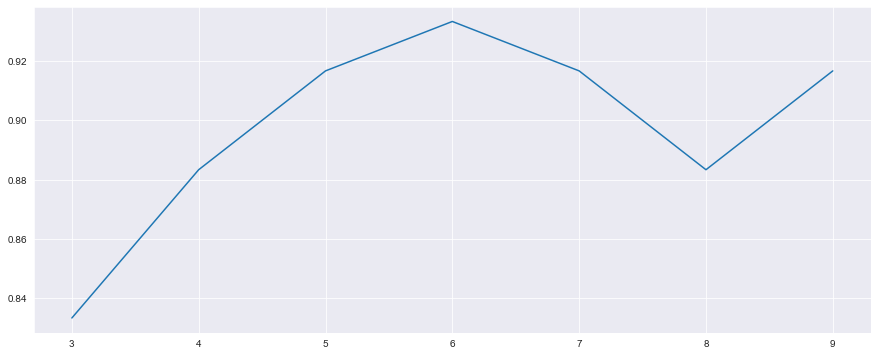

In [267]:
# Optimum Sayıda Komşu Bulma

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [268]:
# K Nearest Neighbor Classifier ı eğitme

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [269]:
# Test setinin sonucunu öngörme

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [270]:
# karmaşıklık matrisi oluşturma ve doğruluk değerini hesaplama

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[42  1]
 [ 3 14]]
0.9333333333333333


----

3. DESTEK VEKTÖR SINIFLANDIRMASI (SUPPORT VECTOR CLASSIFIER)

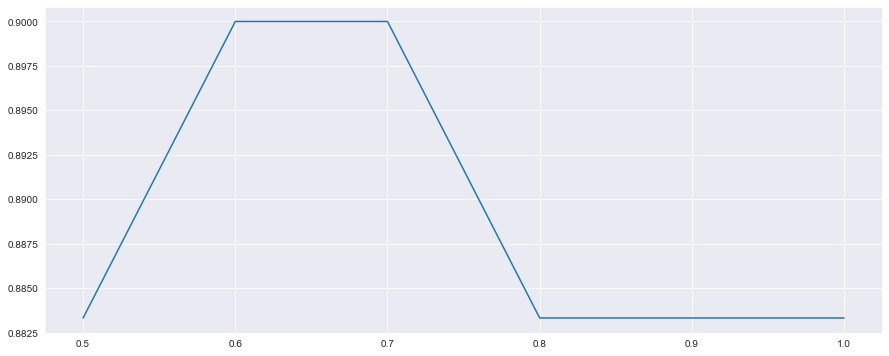

In [271]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [272]:
# Support Vector Classifier ı eğitme

from sklearn.svm import SVC
classifier = SVC(C = 0.6, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=0.6, random_state=0)

In [273]:
# Test seti sonuçlarını öngörme
y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0]


In [274]:
# karmaşıklık matrisi oluşturma ve doğruluk değerini hesaplama

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[40  3]
 [ 3 14]]
0.9


-----

4. KARAR AĞACI SINIFLANDIRMASI (DECISION TREE CLASSIFIER)

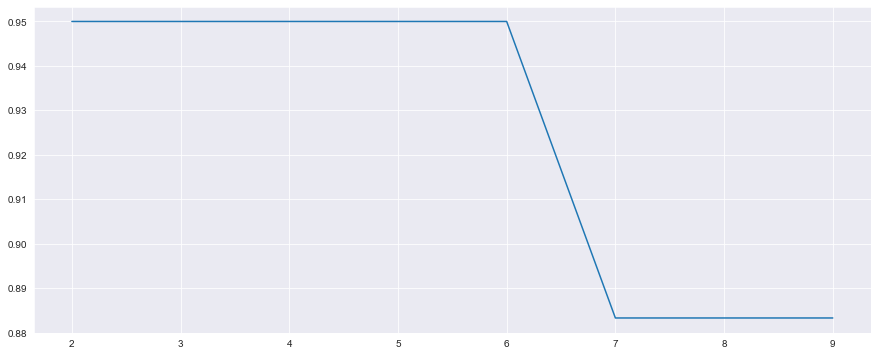

In [275]:
# max_leaf_nodes un optimum sayısını bulma

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,10)), list1)
plt.show()

In [276]:
# Decision Tree Classifier ı eğitme

classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [277]:
# Test setinin sonuçlarını öngörme

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [278]:
# karmaşıklık matrisi oluşturma ve doğruluk değerini hesaplama

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[43  0]
 [ 3 14]]
0.95


-----

5. RASTGELE ORMAN SINIFLANDIRMASI (RANDOM FOREST CLASSIFCATION)

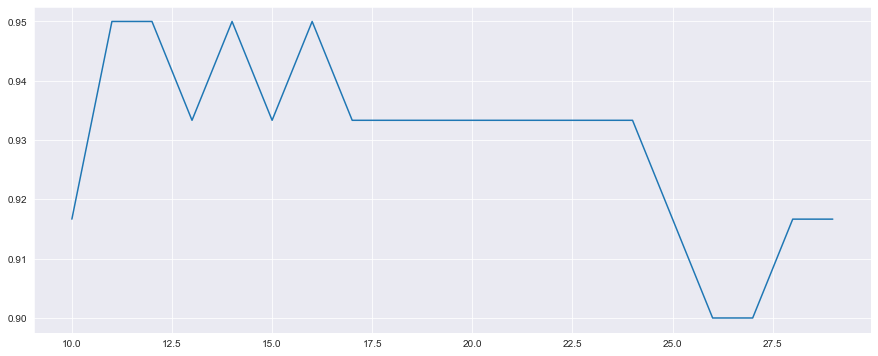

In [279]:
#Optimum n_estimators sayısını bulma

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [280]:
# RandomForest Classifier ı eğitme

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 11, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0)

In [281]:
# Test setinin sonuçlarını öngörme

y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [282]:
# karmaşıklık matrisi oluşturma ve doğruluk değerini hesaplama

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[41  2]
 [ 1 16]]
0.95


----

6. ANN

In [283]:
np.random.seed(0)
import tensorflow as tf

#ANN i initialize etme

ann = tf.keras.models.Sequential()

In [284]:
# Giriş ve birinci gizli katmanı ekleme

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [285]:
# İkinci gizli katmanı ekleme

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [286]:
# Üçüncü gizli katmanı ekleme

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [287]:
# Dördüncü gizli katmanı ekleme

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [288]:
# Çıkış katmanını ekleme

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [289]:
# ANN i derleme

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

In [290]:
# ANN i eğitme

ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 5s 3ms/step - loss: 0.7009 - accuracy: 0.4810
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5612
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5907
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6751
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.7215
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6614 - accuracy: 0.7384
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.7595
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.7637
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.7722
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.7890
Epoch 11/100
8/8 [===========

In [291]:
# Test setinin sonuçlarını öngörme

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()
print(np.concatenate( (y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [292]:
# karmaşıklık matrisi oluşturma ve doğruluk değerini hesaplama

from sklearn.metrics import confusion_matrix, accuracy_score

# karmaşıklık matrisi
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# doğruluk değeri
ac = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac)
mylist.append(ac)

Confusion Matrix
[[40  3]
 [ 3 14]]

Accuracy
0.9


-----

[20:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do th


[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do th

[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do th

[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do th

[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



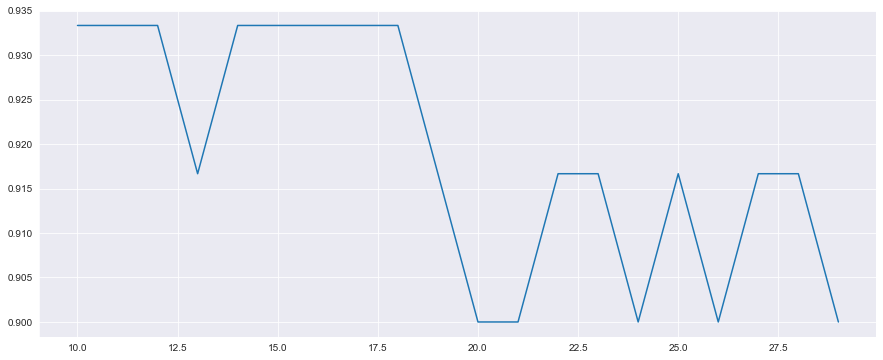

In [293]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [294]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

[20:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\tugba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [295]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [296]:
## karmaşıklık matrisi oluşturma ve doğruluk değerini hesaplama

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[41  2]
 [ 2 15]]
0.9333333333333333


----

In [297]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)

Learning rate set to 0.005571
0:	learn: 0.6889803	total: 18.5ms	remaining: 18.4s
1:	learn: 0.6840741	total: 20.6ms	remaining: 10.3s
2:	learn: 0.6793323	total: 22.6ms	remaining: 7.52s
3:	learn: 0.6746467	total: 24.5ms	remaining: 6.11s
4:	learn: 0.6703687	total: 26.7ms	remaining: 5.32s
5:	learn: 0.6669559	total: 28.3ms	remaining: 4.68s
6:	learn: 0.6633087	total: 30.8ms	remaining: 4.37s
7:	learn: 0.6591787	total: 35ms	remaining: 4.34s
8:	learn: 0.6560658	total: 37.7ms	remaining: 4.15s
9:	learn: 0.6524370	total: 39.8ms	remaining: 3.94s
10:	learn: 0.6484216	total: 42.2ms	remaining: 3.79s
11:	learn: 0.6440005	total: 44.1ms	remaining: 3.63s
12:	learn: 0.6401795	total: 46ms	remaining: 3.49s
13:	learn: 0.6356729	total: 53.8ms	remaining: 3.79s
14:	learn: 0.6313012	total: 55.8ms	remaining: 3.67s
15:	learn: 0.6283282	total: 57.3ms	remaining: 3.53s
16:	learn: 0.6245777	total: 59.3ms	remaining: 3.43s
17:	learn: 0.6210570	total: 61.2ms	remaining: 3.34s
18:	learn: 0.6171822	total: 63.1ms	remaining: 3.

In [298]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [299]:
# # karmaşıklık matrisi oluşturma ve doğruluk değerini hesaplama

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[40  3]
 [ 3 14]]
0.9


9. GRADIENT BOOSTER CLASSIFIER

In [300]:
from colorama import Fore, Back, Style 
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
mylist.append(gradientboost_acc)




In [301]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  91.67%


<Figure size 1080x432 with 0 Axes>

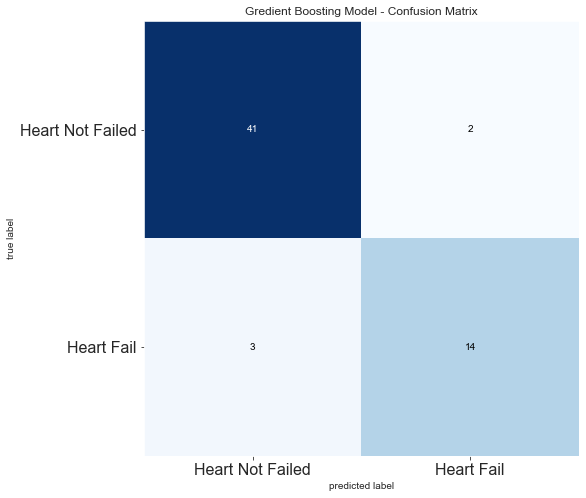

In [302]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [303]:
# Farklı modellerin doğruluk oranlarını hesaplama
mylist

[0.8833333333333333,
 0.9333333333333333,
 0.9,
 0.95,
 0.95,
 0.9,
 0.9333333333333333,
 0.9,
 0.9166666666666666]

In [304]:
mylist2 = ["LojistikRegresyon", "KNN","DestekVektörü","KararAğacı","RastgeleOrman","ANN", "XGBOOST","CATBOOST","GBC"]

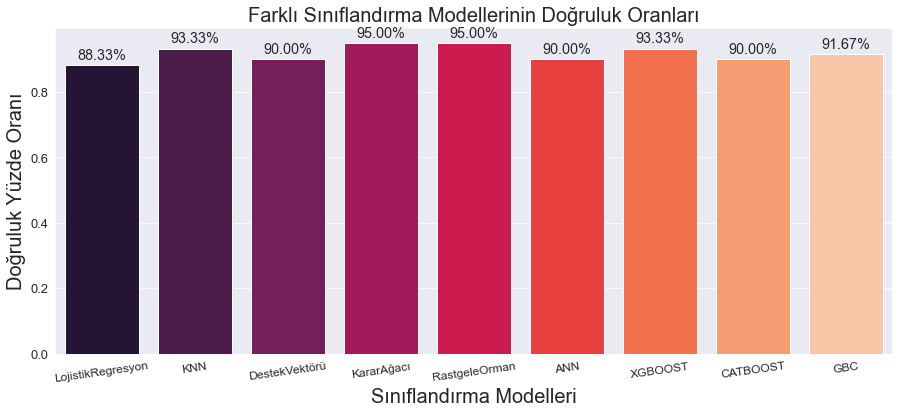

In [305]:
plt.rcParams['figure.figsize']=15,6  
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Sınıflandırma Modelleri", fontsize = 20 )
plt.ylabel("Doğruluk Yüzde Oranı", fontsize = 20)
plt.title("Farklı Sınıflandırma Modellerinin Doğruluk Oranları", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()